In [8]:
import numpy

import constants
import rscha2d
import trig
import fibonacci_sphere
import coords

from matplotlib import pyplot

%matplotlib nbagg

In [9]:
lat_c = 42.0
lon_c = 20.0
theta_c, phi_c, theta_0d, theta_0 = numpy.deg2rad((90-lat_c, lon_c, 26.0, 50.0))
knots_bd = numpy.arange(-2000, 2000, 100)

In [48]:
import importlib
importlib.reload(rscha2d)

model_bd = rscha2d.Model()
model_bd.set_model_params(theta_c, phi_c, theta_0d, 0.1, 3, 3, 2, knots=knots_bd,
                          temporal_reg=0, spatial_reg=10, g10_ref=-45)
model_bd.add_data("../data/rscha2d/bd_sha_orig_trim.dat")

lat_all, lon_all = numpy.loadtxt("../data/rscha2d/bd_sha_orig_trim.dat").T[4:6, :]

n_in = len(model_bd.thetav)
n_all = len(lat_all)

<IPython.core.display.Javascript object>


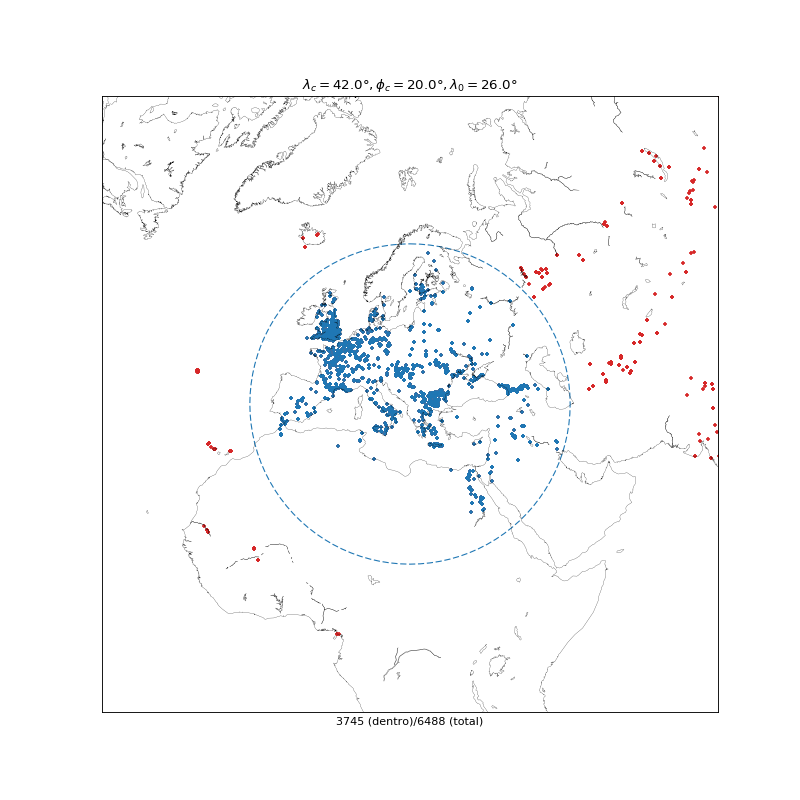

/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [49]:
from mpl_toolkits import basemap

fig, ax = pyplot.subplots(figsize=(10,10))
base = basemap.Basemap(projection="npaeqd", lon_0 = 0, boundinglat=90-numpy.rad2deg(theta_0))
base2 = basemap.Basemap(projection="aeqd", lon_0 = lon_c, lat_0 = lat_c, lat_ts=26,
                        width=base.xmax, height=base.ymax, resolution="l")
base2.drawcoastlines(ax=ax, linewidth=0.2)
#base2.scatter(numpy.rad2deg(phi_d),
#              90-numpy.rad2deg(theta_d), latlon=True, c=Fm_bd, s=18, marker="+",
#              cmap="Spectral", vmin=30, vmax=90)
base2.scatter(lon_all,lat_all,
              s=18, latlon=True, marker="+", color="C3")
base2.scatter(numpy.rad2deg(model_bd.phiv),
              90-numpy.rad2deg(model_bd.thetav),
              s=18, latlon=True, marker="+", color="C0")
base2.tissot(lon_c, lat_c, numpy.rad2deg(theta_0d), 100,
             facecolor="none", edgecolor="C0", linestyle="dashed")

ax.set_title(r"$\lambda_c = {}°, \phi_c = {}°, \lambda_0 = {}°$".format(lat_c, lon_c, numpy.rad2deg(theta_0d)))
ax.set_xlabel("{} (dentro)/{} (total)".format(n_in, n_all))